In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [3]:
df_airlined = pd.read_csv('AirPassengers.csv')
df_airlined.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df_airlined.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df_airlined.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df_airlined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df_airlined['Month']=pd.to_datetime(df_airlined['Month'])

In [8]:
df_airlined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df_airlined.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
df_airlined.set_index("Month", inplace=True)

In [11]:
df_airlined.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

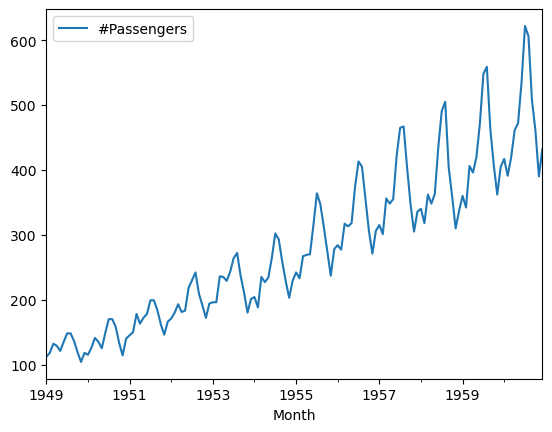

In [12]:
df_airlined.plot() # Seasonal graph and not stationary

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is not stationary")

In [16]:
adf_test(df_airlined['#Passengers'])

ADF Statistics: 0.8153688792060597
p- value: 0.9918802434376411
Weak evidence against null hypothesis, time series has a unit root, indicating it is not stationary


In [17]:
df_airlined['Passengers first difference'] = df_airlined['#Passengers'] - df_airlined['#Passengers'].shift(1)

In [18]:
df_airlined.head()

,#Passengers,Passengers first difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [19]:
adf_test(df_airlined['Passengers first difference'].dropna())

ADF Statistics: -2.829266824169992
p- value: 0.0542132902838265
Weak evidence against null hypothesis, time series has a unit root, indicating it is not stationary


In [20]:
df_airlined['Passengers Second difference'] = df_airlined['Passengers first difference'] - df_airlined['Passengers first difference'].shift(1)

In [21]:
adf_test(df_airlined['Passengers Second difference'].dropna())

ADF Statistics: -16.384231542468527
p- value: 2.732891850014085e-29
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
# seasonal data: 12 months
# Use techniques Differencing
df_airlined['Passengers 12 difference'] = df_airlined['#Passengers'] - df_airlined['#Passengers'].shift(12)

In [24]:
adf_test(df_airlined['Passengers 12 difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

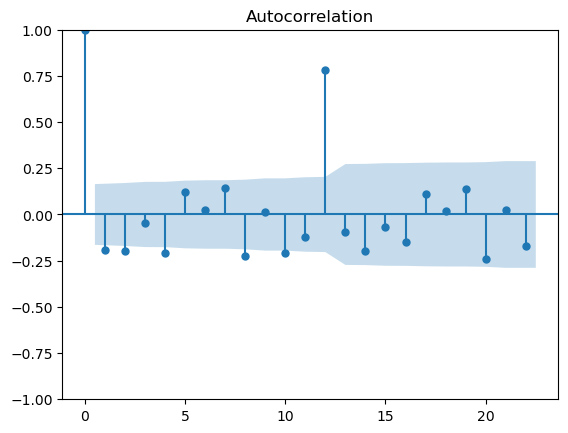

In [30]:
acf = plot_acf(df_airlined['Passengers Second difference'].dropna())

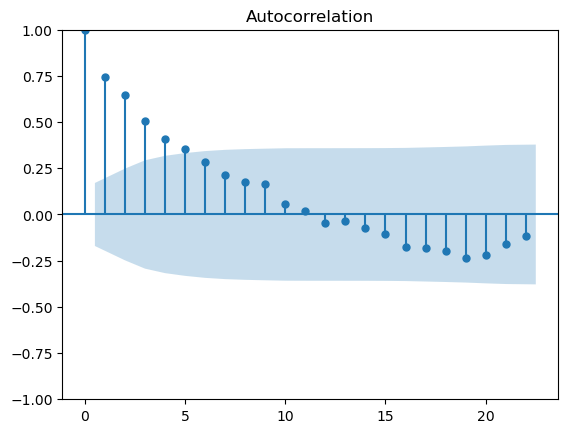

In [31]:
acf = plot_acf(df_airlined['Passengers 12 difference'].dropna())

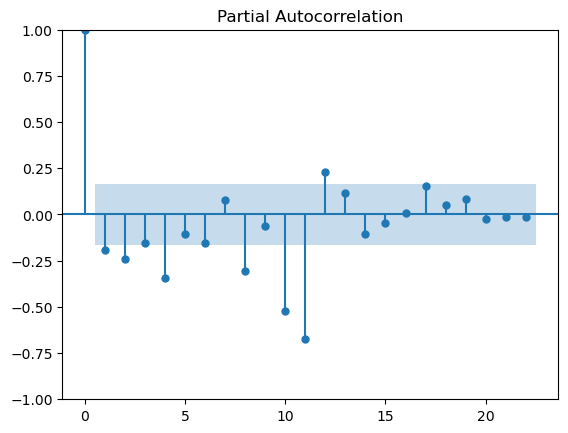

In [33]:
acf = plot_pacf(df_airlined['Passengers Second difference'].dropna())

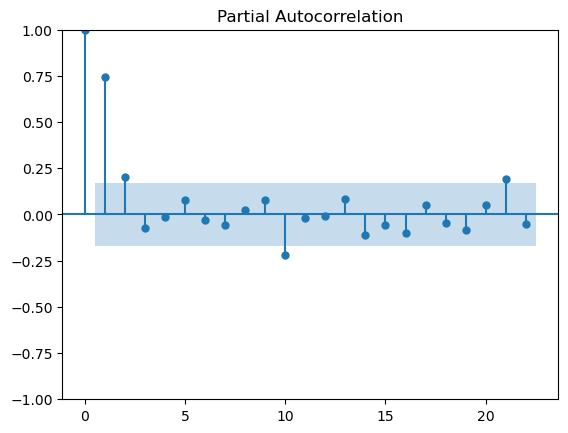

In [34]:
acf = plot_pacf(df_airlined['Passengers 12 difference'].dropna())

In [35]:
df_airlined

,#Passengers,Passengers first difference,Passengers Second difference,Passengers 12 difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [36]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955, 12,1)
test_dataset_end = datetime(1960, 12,1)

In [37]:
train_data = df_airlined[:train_dataset_end]
test_data = df_airlined[train_dataset_end+timedelta(days=1):test_dataset_end]

In [38]:
test_data

,#Passengers,Passengers first difference,Passengers Second difference,Passengers 12 difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [43]:
# Create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [44]:
train_data

,#Passengers,Passengers first difference,Passengers Second difference,Passengers 12 difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [46]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model with the correct ARIMA class
model_ARIMA = ARIMA(train_data['#Passengers'], order=(10, 2, 12))


C:\Users\rpcha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rpcha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rpcha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
model_ARIMA_fit = model_ARIMA.fit()

C:\Users\rpcha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rpcha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                   84
Model:               ARIMA(10, 2, 12)   Log Likelihood                -307.732
Date:                Fri, 08 Nov 2024   AIC                            661.465
Time:                        00:03:52   BIC                            716.819
Sample:                    01-01-1949   HQIC                           683.689
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0468      0.115      0.408      0.683      -0.178       0.271
ar.L2         -1.0429      0.084    -12.489      0.000      -1.207      -0.879
ar.L3          0.0886      0.139      0.639      0.523      -0.183       0.360
ar.L4         -1.0258      0.131     -7.833      0.000      -1.283      -0.769
ar.L5          0.0657      0.155      0.423      0.672      -0.239       0.370
ar.L6         -0.9860      0.143     -6.883      0.000      -1.267      -0.705
ar.L7          0.0175      0.142      0.123      0.902      -0.261       0.296
ar.L8         -0.9822      0.122     -8.027      0.000      -1.222      -0.742
ar.L9         -0.0069      0.095     -0.073      0.942      -0.193       0.179
ar.L10        -0.9389      0.085    -11.091      0.000      -1.105      -0.773
ma.L1         -1.2855      0.254     -5.059      0.000      -1.784      -0.787
ma.L2          1.2391      0.358      3.458      0.001       0.537       1.942
ma.L3         -1.4411      0.436     -3.305      0.001      -2.296      -0.586
ma.L4          1.3755      0.506      2.716      0.007       0.383       2.368
ma.L5         -1.2158      0.574     -2.117      0.034      -2.341      -0.090
ma.L6          1.0825      0.660      1.641      0.101      -0.211       2.376
ma.L7         -1.0696      0.714     -1.497      0.134      -2.470       0.331
ma.L8          0.8856      0.819      1.082      0.279      -0.719       2.490
ma.L9         -0.7848      0.736     -1.066      0.287      -2.228       0.659
ma.L10         0.5230      0.601      0.870      0.384      -0.655       1.701
ma.L11        -0.4129      0.455     -0.908      0.364      -1.304       0.478
ma.L12         0.1334      0.273      0.489      0.625      -0.402       0.669
sigma2        77.2147     16.202      4.766      0.000      45.459     108.970
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# Predictions
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [51]:
pred = model_ARIMA_fit.predict(start=pred_start_date, end = pred_end_date)
residuals = test_data['#Passengers']-pred

In [52]:
residuals

Month
1956-01-01      0.742756
1956-02-01      7.475822
1956-03-01     21.809066
1956-04-01     14.406846
1956-05-01     18.892247
1956-06-01     28.638909
1956-07-01     24.513064
1956-08-01     33.115236
1956-09-01     14.928023
1956-10-01      3.102684
1956-11-01     -0.803379
1956-12-01      3.372851
1957-01-01      3.908445
1957-02-01      7.186351
1957-03-01     39.033909
1957-04-01     23.476401
1957-05-01     28.887766
1957-06-01     49.293092
1957-07-01     50.440887
1957-08-01     70.453904
1957-09-01     38.727310
1957-10-01     14.779334
1957-11-01      2.494814
1957-12-01      6.548333
1958-01-01      1.444865
1958-02-01     -0.403994
1958-03-01     23.047361
1958-04-01     -2.527898
1958-05-01      9.756344
1958-06-01     35.421399
1958-07-01     50.505405
1958-08-01     83.711661
1958-09-01     13.357665
1958-10-01     -2.572501
1958-11-01    -23.162868
1958-12-01    -19.280639
1959-01-01     -5.702316
1959-02-01     -1.266176
1959-03-01     44.817398
1959-04-01     19.4

<Axes: ylabel='Density'>

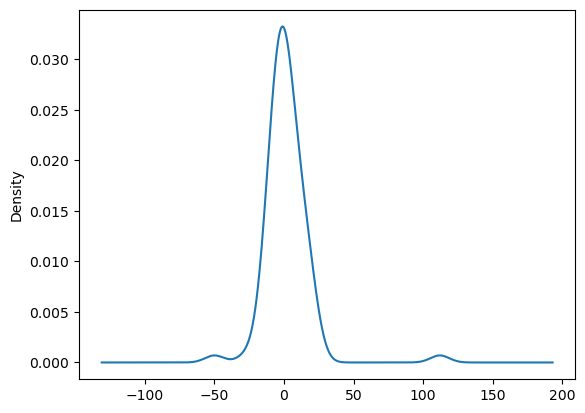

In [53]:
model_ARIMA_fit.resid.plot(kind='kde')

In [54]:
test_data['Predicted_ARIMA']=pred

C:\Users\rpcha\AppData\Local\Temp\ipykernel_1020\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

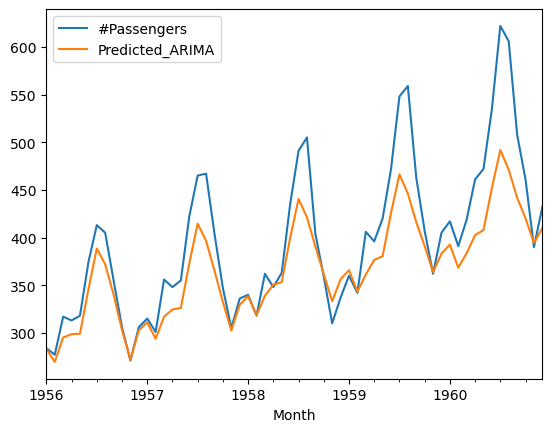

In [56]:
test_data[['#Passengers', 'Predicted_ARIMA']].plot()

In [64]:
# Create a SARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model with the correct ARIMA class
model_SARIMA = SARIMAX(train_data['#Passengers'], order=(3,0,5), seasonal_order=(1,1,1,12))


C:\Users\rpcha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rpcha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [65]:
model_SARIMA=model_SARIMA.fit()

C:\Users\rpcha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 1, [1], 12)   Log Likelihood                -263.914
Date:                              Fri, 08 Nov 2024   AIC                            549.828
Time:                                      00:24:45   BIC                            574.872
Sample:                                  01-01-1949   HQIC                           559.798
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5568      3.576      0.156      0.876      -6.453       7.566
ar.L2          0.8510      0.396      2.150      0.032       0.075       1.627
ar.L3         -0.4187      3.250     -0.129      0.897      -6.789       5.952
ma.L1          0.2047      3.489      0.059      0.953      -6.633       7.043
ma.L2         -0.5151      2.562     -0.201      0.841      -5.537       4.507
ma.L3         -0.0925      0.748     -0.124      0.902      -1.559       1.374
ma.L4         -0.1903      0.575     -0.331      0.741      -1.318       0.938
ma.L5          0.1648      0.982      0.168      0.867      -1.760       2.090
ar.S.L12      -0.3122      0.863     -0.362      0.717      -2.004       1.379
ma.S.L12       0.1042      0.949      0.110      0.913      -1.756       1.964
sigma2        83.9934     32.165      2.611      0.009      20.951     147.035
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.87
Prob(Q):                              0.91   Prob(JB):                         0.39
Heteroskedasticity (H):               2.41   Skew:                             0.39
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
# Predictions
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [68]:
pred = model_SARIMA.predict(start=pred_start_date, end = pred_end_date)
residuals = test_data['#Passengers']-pred

In [69]:
residuals

Month
1956-01-01      0.835085
1956-02-01     -0.143385
1956-03-01      7.979390
1956-04-01      4.360191
1956-05-01      7.470307
1956-06-01     21.486094
1956-07-01     14.100088
1956-08-01     22.142965
1956-09-01      7.555403
1956-10-01     -4.666099
1956-11-01     -4.480761
1956-12-01     -7.081624
1957-01-01     -4.512923
1957-02-01    -11.659257
1957-03-01     11.862764
1957-04-01      3.916266
1957-05-01      9.898526
1957-06-01     34.409027
1957-07-01     30.781307
1957-08-01     49.565313
1957-09-01     22.401364
1957-10-01      3.004638
1957-11-01     -2.711705
1957-12-01     -9.931811
1958-01-01    -11.454756
1958-02-01    -26.421778
1958-03-01    -13.528517
1958-04-01    -26.937826
1958-05-01    -12.747565
1958-06-01     17.350646
1958-07-01     27.264359
1958-08-01     58.241150
1958-09-01     -6.602400
1958-10-01    -13.838758
1958-11-01    -26.457777
1958-12-01    -37.073354
1959-01-01    -19.451320
1959-02-01    -30.070141
1959-03-01      3.124793
1959-04-01     -6.0

<Axes: ylabel='Density'>

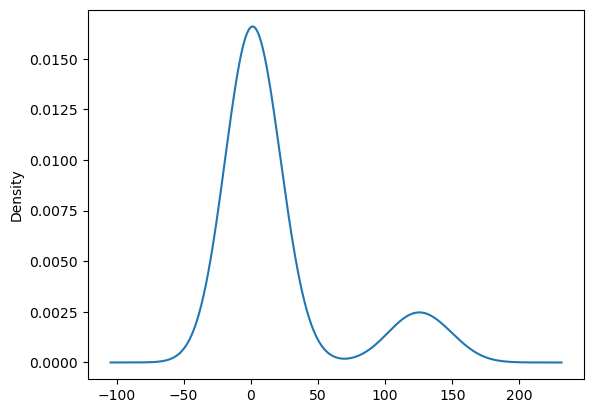

In [70]:
model_SARIMA.resid.plot(kind='kde')

In [71]:
test_data['Predicted_SARIMA']=pred

C:\Users\rpcha\AppData\Local\Temp\ipykernel_1020\1545568125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred


<Axes: xlabel='Month'>

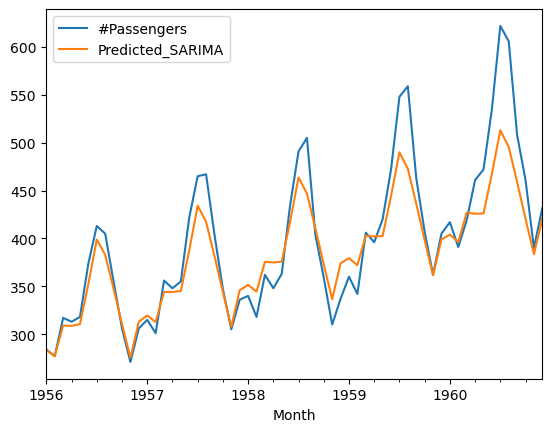

In [72]:
test_data[['#Passengers', 'Predicted_SARIMA']].plot()